In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [1]:
tf.__version__

NameError: name 'tf' is not defined

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = keras.datasets.fashion_mnist

In [4]:
data

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\envs\\test_env\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

# Split

In [5]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

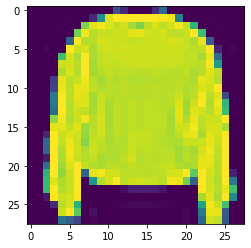

In [8]:
plt.imshow(train_images[7])
plt.show()

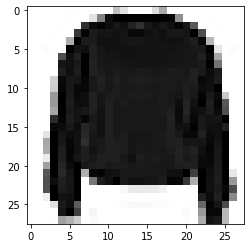

In [9]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
metrics=["accuracy"])

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


InternalError:  Blas GEMM launch failed : a.shape=(32, 784), b.shape=(784, 128), m=32, n=128, k=784
	 [[node sequential/dense/MatMul (defined at <ipython-input-12-b4de695e0465>:1) ]] [Op:__inference_train_function_539]

Function call stack:
train_function


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [15]:
print(test_acc, test_acc)

0.8711000084877014 0.8711000084877014


In [16]:
prediction = model.predict(test_images)

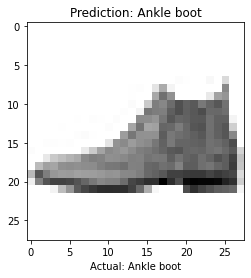

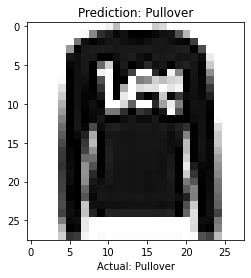

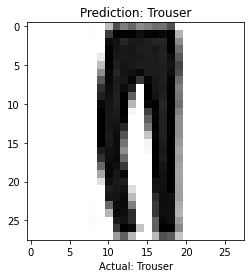

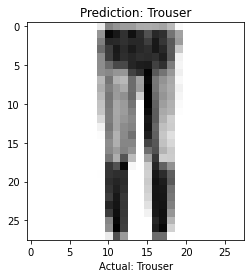

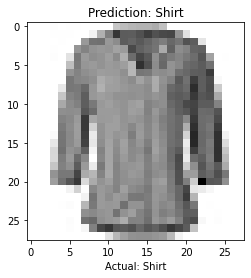

In [17]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()